In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

import warnings
warnings.filterwarnings('ignore')

## Heart Failure Prediction

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [2]:
df=pd.read_csv('Heart failure prediction dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Key Features:

Age: Advanced age can increase the risk of heart failure due to the natural wear and tear on the heart muscles over time.

Anaemia: Low red blood cell count may lead to reduced oxygen delivery to the heart, potentially causing heart failure.

Creatinine_Phosphokinase: Elevated levels may indicate heart muscle damage, which could contribute to heart failure.

Diabetes: Poorly managed diabetes can damage blood vessels and nerves, increasing the likelihood of heart failure.

Ejection_Fraction: A low ejection fraction (the amount of blood pumped out of the heart) may signal heart muscle weakness.

High_Blood_Pressure: Prolonged high blood pressure can strain the heart and increase the risk of heart failure.

Platelets: Abnormal platelet levels may lead to blood clots, which can cause heart problems, including heart failure.

Serum_Creatinine: High levels may suggest impaired kidney function, affecting fluid balance and potentially leading to heart failure.

Serum_Sodium: Abnormal levels can disrupt fluid balance and influence heart function, contributing to heart failure.

Sex: Gender differences can impact heart disease risk, with males having a higher risk of heart failure.

Smoking: Tobacco use damages blood vessels and increases the risk of heart failure.

Time: The duration of exposure to risk factors and the progression of underlying conditions can influence heart failure risk.

DEATH_EVENT: Patient death or not

In [3]:
#EDA Steps

## Data Overview

We first load the dataset and display basic information such as column names, data types, and non-null counts.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Handle Null Values

We check for missing values in the dataset. In this case, there are no missing values.

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
features=df.iloc[:,0:-1]
target=df.iloc[:,-1]

In [9]:
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [10]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

## Outlier Removal

We detect and remove outliers using the Interquartile Range (IQR) method for selected numerical columns.

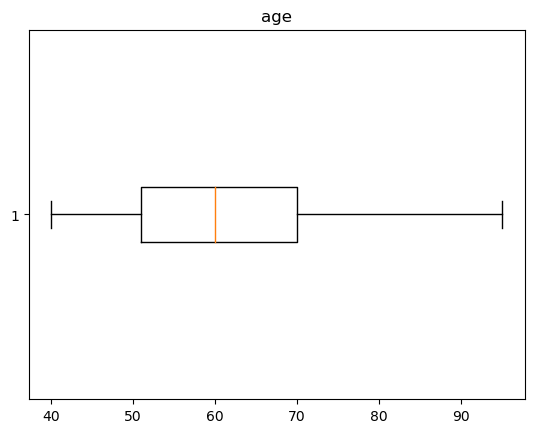

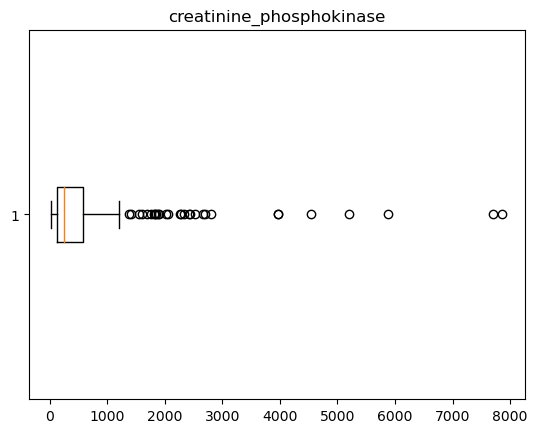

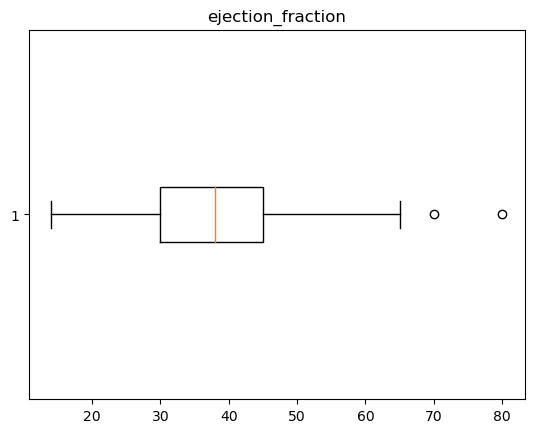

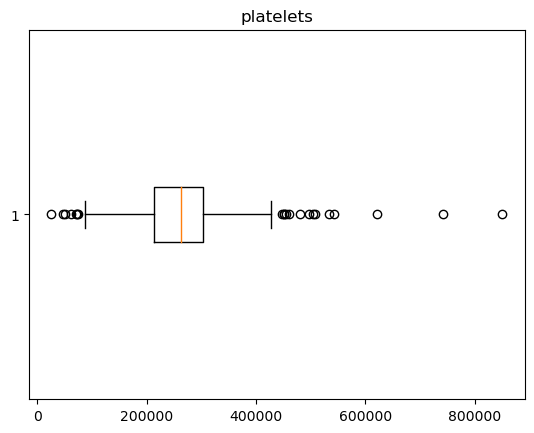

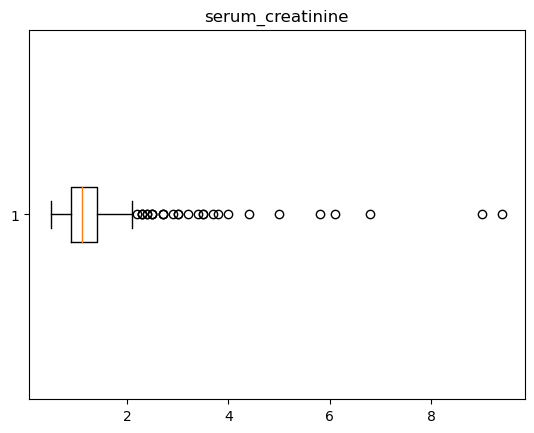

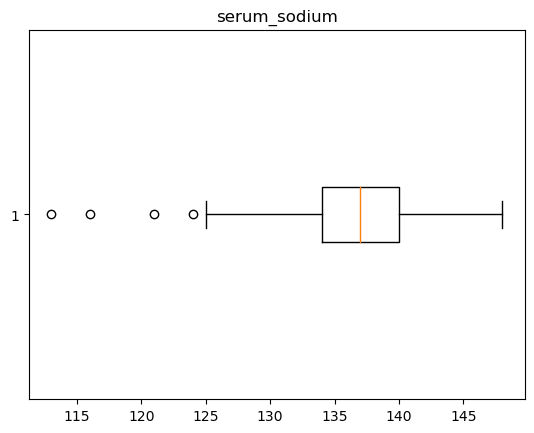

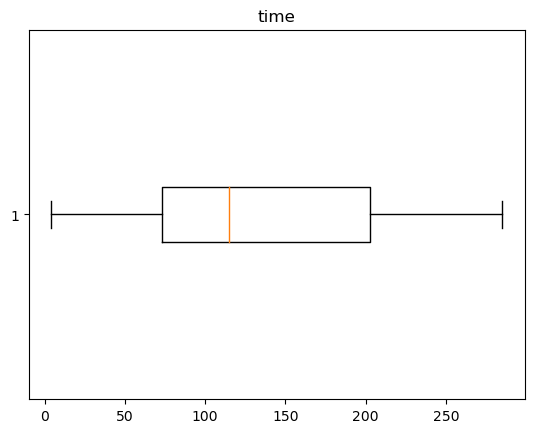

In [11]:
#Detecting outliers
numerical=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

In [12]:
#Removing outliers
def remove_outliers(df):
    for col in df.columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_bound=q3+1.5*iqr
        lower_bound=q1-1.5*iqr
        df=df[(df[col]>lower_bound)&(df[col]<upper_bound)]
    return df

df=remove_outliers(df)

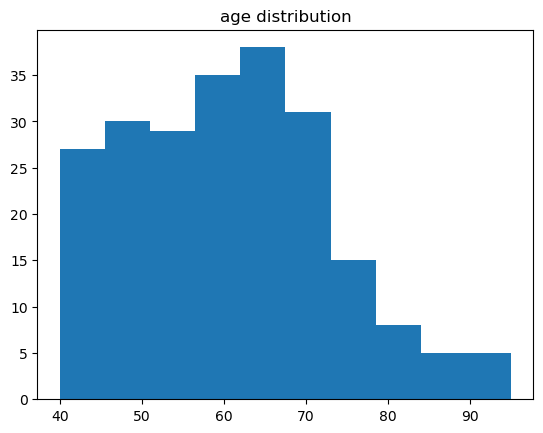

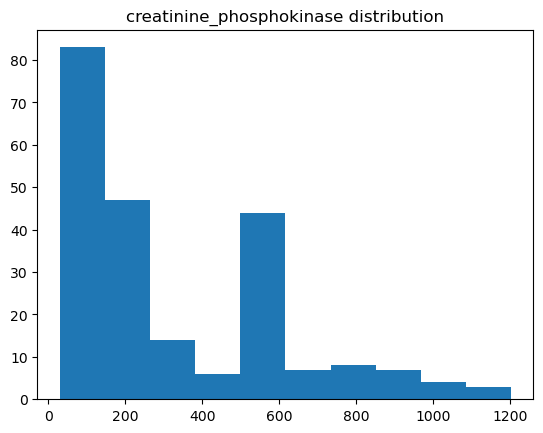

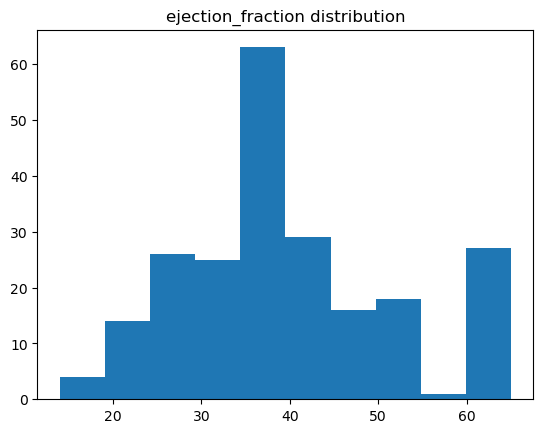

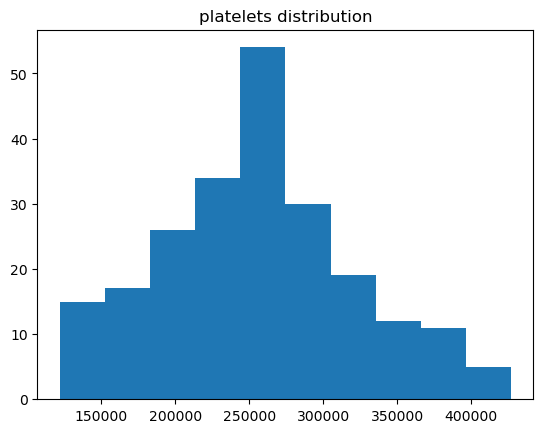

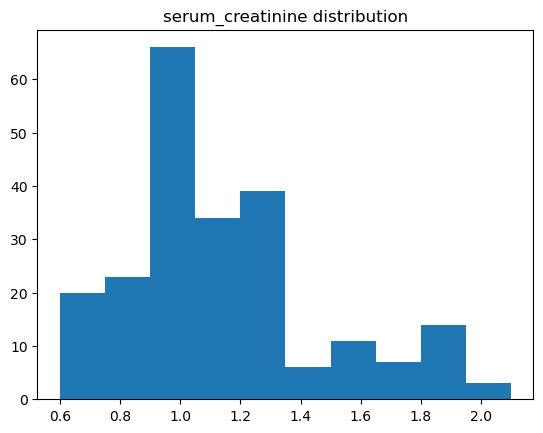

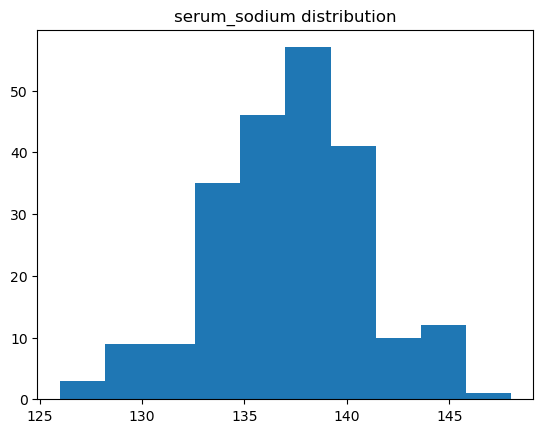

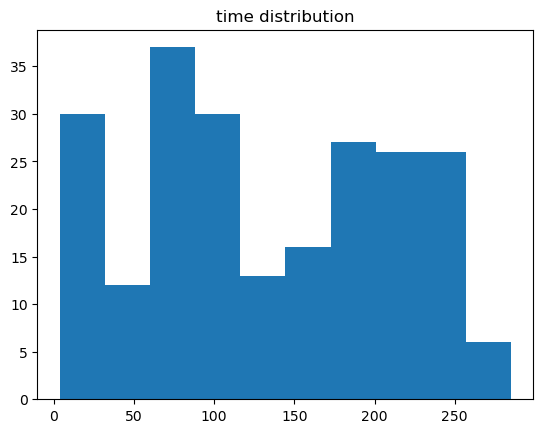

In [13]:
#Distribution of features

for i in numerical:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

## Skewness Removal

We check for skewness in numerical features. 

In [14]:
col=features.select_dtypes(['int','float']).columns
features[col]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [15]:
from scipy.stats import skew

age
0.4209365580238486


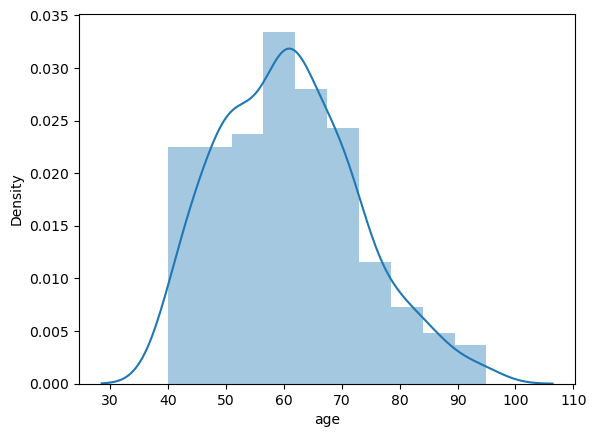

anaemia
0.27686275801578286


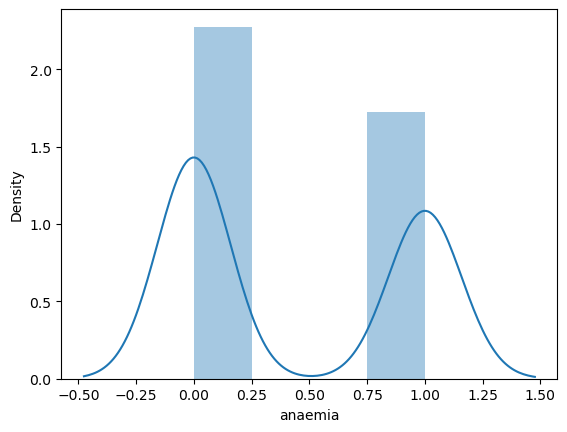

creatinine_phosphokinase
4.440688625555512


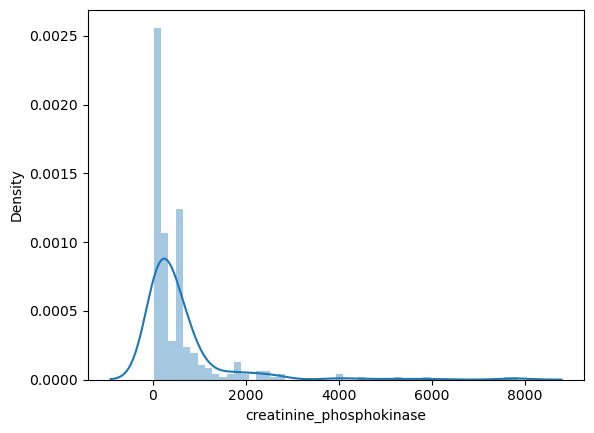

diabetes
0.33225111677419733


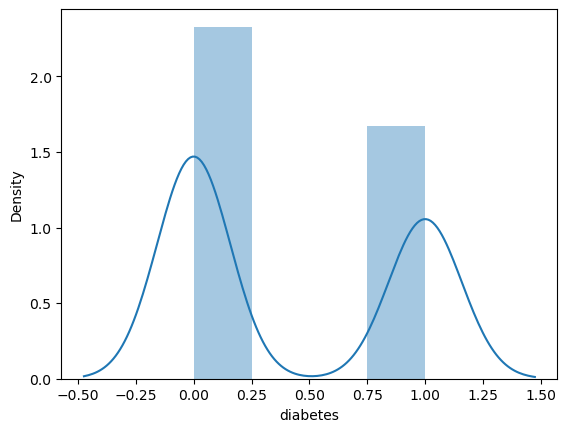

ejection_fraction
0.5525926588215331


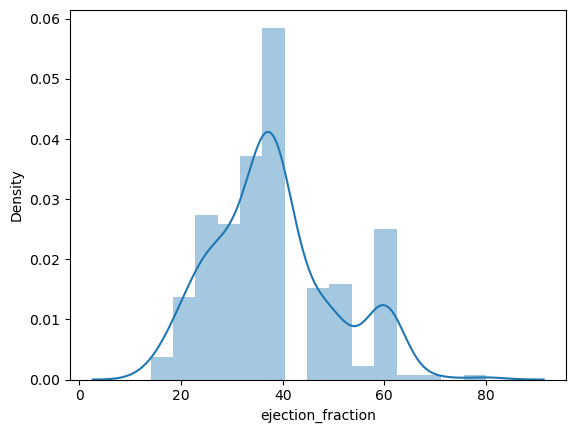

high_blood_pressure
0.6235833232384503


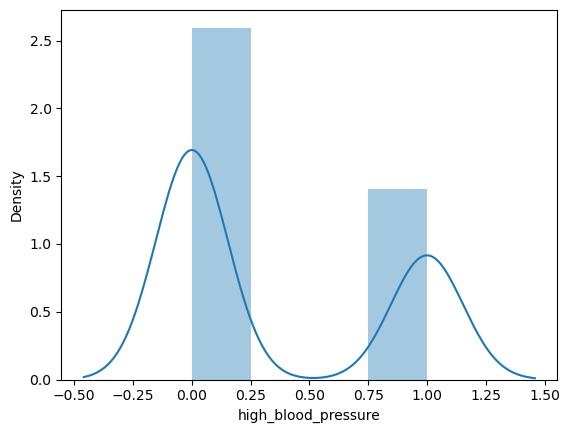

platelets
1.4549745335147466


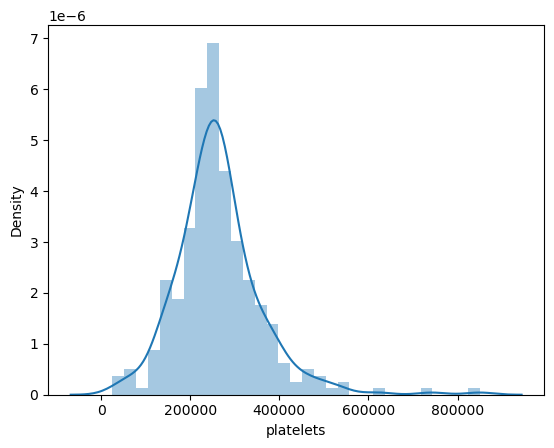

serum_creatinine
4.433610162782361


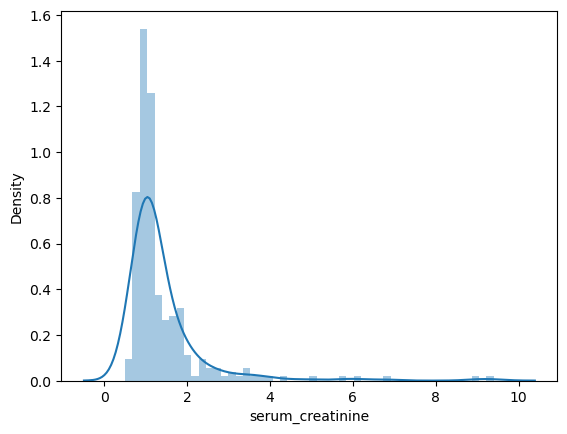

serum_sodium
-1.04287046392733


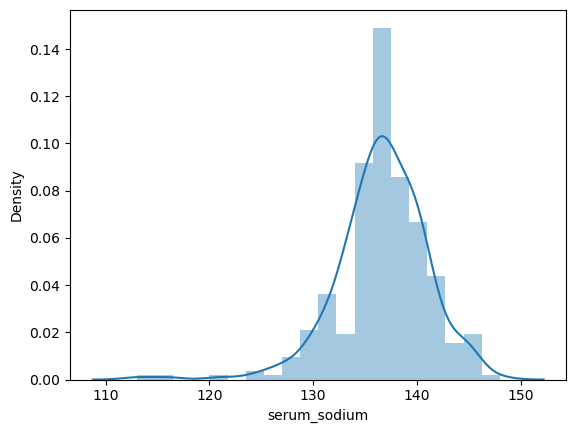

sex
-0.6235833232384503


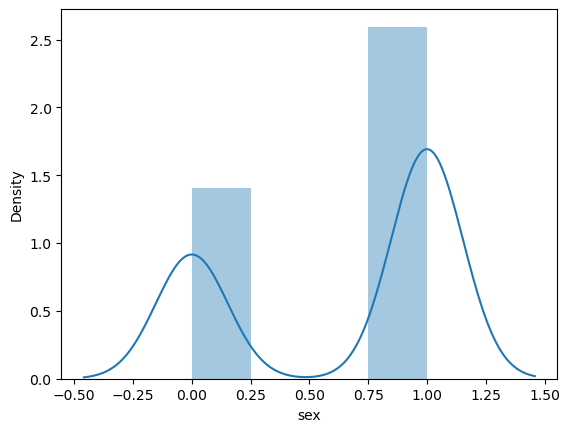

smoking
0.7664787911444256


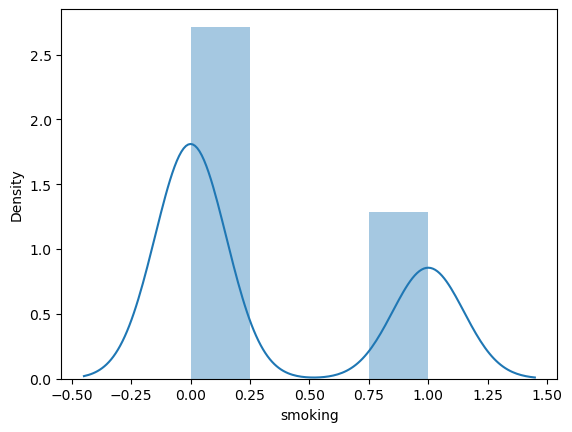

time
0.12716059964019436


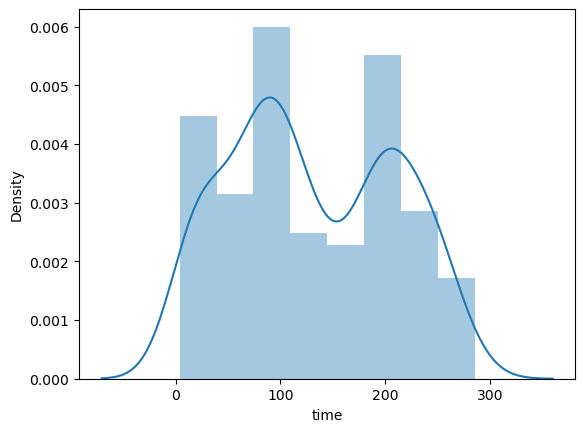

In [16]:
for i in features[col]:
    print(i)
    print(skew(features[i]))
    
    plt.figure()
    sns.distplot(features[i])
    plt.show()

In [17]:
pd.concat([features,target],axis=1).corr().style.background_gradient()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Encoding

We check if categorical variables need encoding. In this dataset, binary variables 'sex', 'smoking', and 'high_blood_pressure' do not require encoding.

In [18]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


## Data Scaling

 We standardize numerical columns using StandardScaler to bring them to a common scale.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
numcol=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
df[numcol]=scaler.fit_transform(df[numcol])

In [21]:
df[numcol]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.197013,0.885051,-1.556152,0.136644,2.360754,-1.908282
2,0.357246,-0.679924,-1.556152,-1.397214,0.527505,-2.177105
3,-0.902405,-0.805553,-1.556152,-0.682406,2.360754,-0.026521
5,2.456664,-1.035274,0.165187,-0.771757,2.971837,-1.370636
6,1.197013,-0.320985,-1.986487,-1.918427,0.221963,-0.026521
...,...,...,...,...,...,...
291,-0.062638,-0.055370,-0.265148,-1.829077,0.833046,0.511125
292,-0.734451,-0.521991,-0.006947,1.878987,-0.389120,0.779948
293,0.189293,-0.834268,-0.265148,-1.144053,-0.694662,-0.295344
294,0.105316,-0.985022,-0.006947,-1.501456,-0.083579,1.586417


## Feature Engineering

You can create new features based on domain knowledge or feature importance analysis.
After completing these steps, your dataset should be prepared for further analysis or modeling.

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.197013,0,0.885051,0,-1.556152,1,0.136644,2.360754,-1.908282,1,0,4,1
2,0.357246,0,-0.679924,0,-1.556152,0,-1.397214,0.527505,-2.177105,1,1,7,1
3,-0.902405,1,-0.805553,0,-1.556152,0,-0.682406,2.360754,-0.026521,1,0,7,1
5,2.456664,1,-1.035274,0,0.165187,1,-0.771757,2.971837,-1.370636,1,1,8,1
6,1.197013,1,-0.320985,0,-1.986487,0,-1.918427,0.221963,-0.026521,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-0.062638,0,-0.055370,0,-0.265148,0,-1.829077,0.833046,0.511125,1,0,258,0
292,-0.734451,0,-0.521991,1,-0.006947,0,1.878987,-0.389120,0.779948,1,1,258,0
293,0.189293,1,-0.834268,1,-0.265148,0,-1.144053,-0.694662,-0.295344,1,1,270,0
294,0.105316,0,-0.985022,1,-0.006947,1,-1.501456,-0.083579,1.586417,1,1,270,0


## Machine learning models

Independent and dependent variables

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.197013,0,0.885051,0,-1.556152,1,0.136644,2.360754,-1.908282,1,0,4
2,0.357246,0,-0.679924,0,-1.556152,0,-1.397214,0.527505,-2.177105,1,1,7
3,-0.902405,1,-0.805553,0,-1.556152,0,-0.682406,2.360754,-0.026521,1,0,7
5,2.456664,1,-1.035274,0,0.165187,1,-0.771757,2.971837,-1.370636,1,1,8
6,1.197013,1,-0.320985,0,-1.986487,0,-1.918427,0.221963,-0.026521,1,0,10


In [25]:
y.head()

0    1
2    1
3    1
5    1
6    1
Name: DEATH_EVENT, dtype: int64

### Train, Test splitting

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

### Standardizing data

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

## Predicting the data using Logistic Regression:

Implementation

In [29]:
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [30]:
ypred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0], dtype=int64)

Evaluation

In [31]:
accuracy_list=[]
logreg_acc=accuracy_score(ytest,ypred)
accuracy_list.append(100*logreg_acc)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.87        45
weighted avg       0.91      0.89      0.88        45



We have achieved an Average Accuracy of 89% which is little bit good.Lets see if we can increase this accuracy by hyper tuning.

Confusion matrix

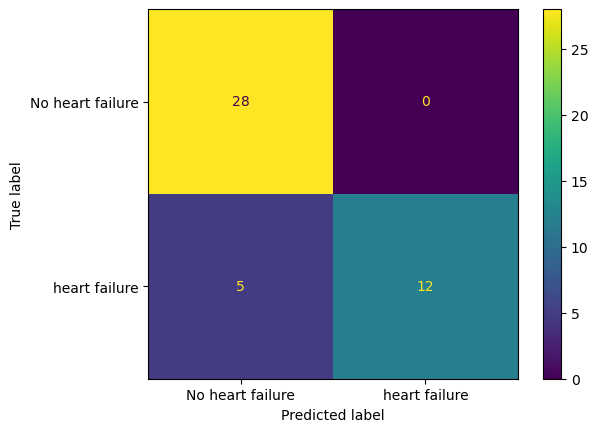

In [32]:
cm=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(cm,display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

## HPT:

In [33]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [34]:
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
print("Accuracy score:",ac)
print(cr)

Accuracy score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.87        45
weighted avg       0.91      0.89      0.88        45



By using liblinear we get the same Accuracy of 89%

In [35]:
logreg=LogisticRegression(solver='newton-cg')
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [36]:
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
print("Accuracy score:",ac)
print(cr)

Accuracy score: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.92      0.85      0.87        45
weighted avg       0.91      0.89      0.88        45



By using newton-cg we get the same Accuracy of 89%

## Predicting the data using Support Vector Classifier(SVC):

Implementation

In [37]:
sv=SVC(C=0.7,kernel='linear',random_state=1,probability=True)
sv.fit(xtrain,ytrain)
sv_pred=sv.predict(xtest)

In [38]:
sv_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0], dtype=int64)

Evaluation

In [39]:
sv_acc=accuracy_score(ytest,sv_pred)
accuracy_list.append(100*sv_acc)
print(classification_report(ytest,sv_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.88      0.90        45
weighted avg       0.92      0.91      0.91        45



By using Support Vector Classifier(SVC) we get 91% accuracy which is good.

## Predicting the data using Decision Tree Classifier:

Implementation

In [40]:
dt=DecisionTreeClassifier(max_leaf_nodes=3,random_state=1,criterion='entropy')
dt.fit(xtrain,ytrain)
dt_pred=dt.predict(xtest)

In [41]:
dt_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0], dtype=int64)

Evaluation

In [42]:
dt_acc=accuracy_score(ytest,dt_pred)
accuracy_list.append(100*dt_acc)
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



In [43]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [44]:
mymodel(dt)

0.8222222222222222
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=1)

By using Decision Tree Classifier we get average accuracy of 82% which is not good.

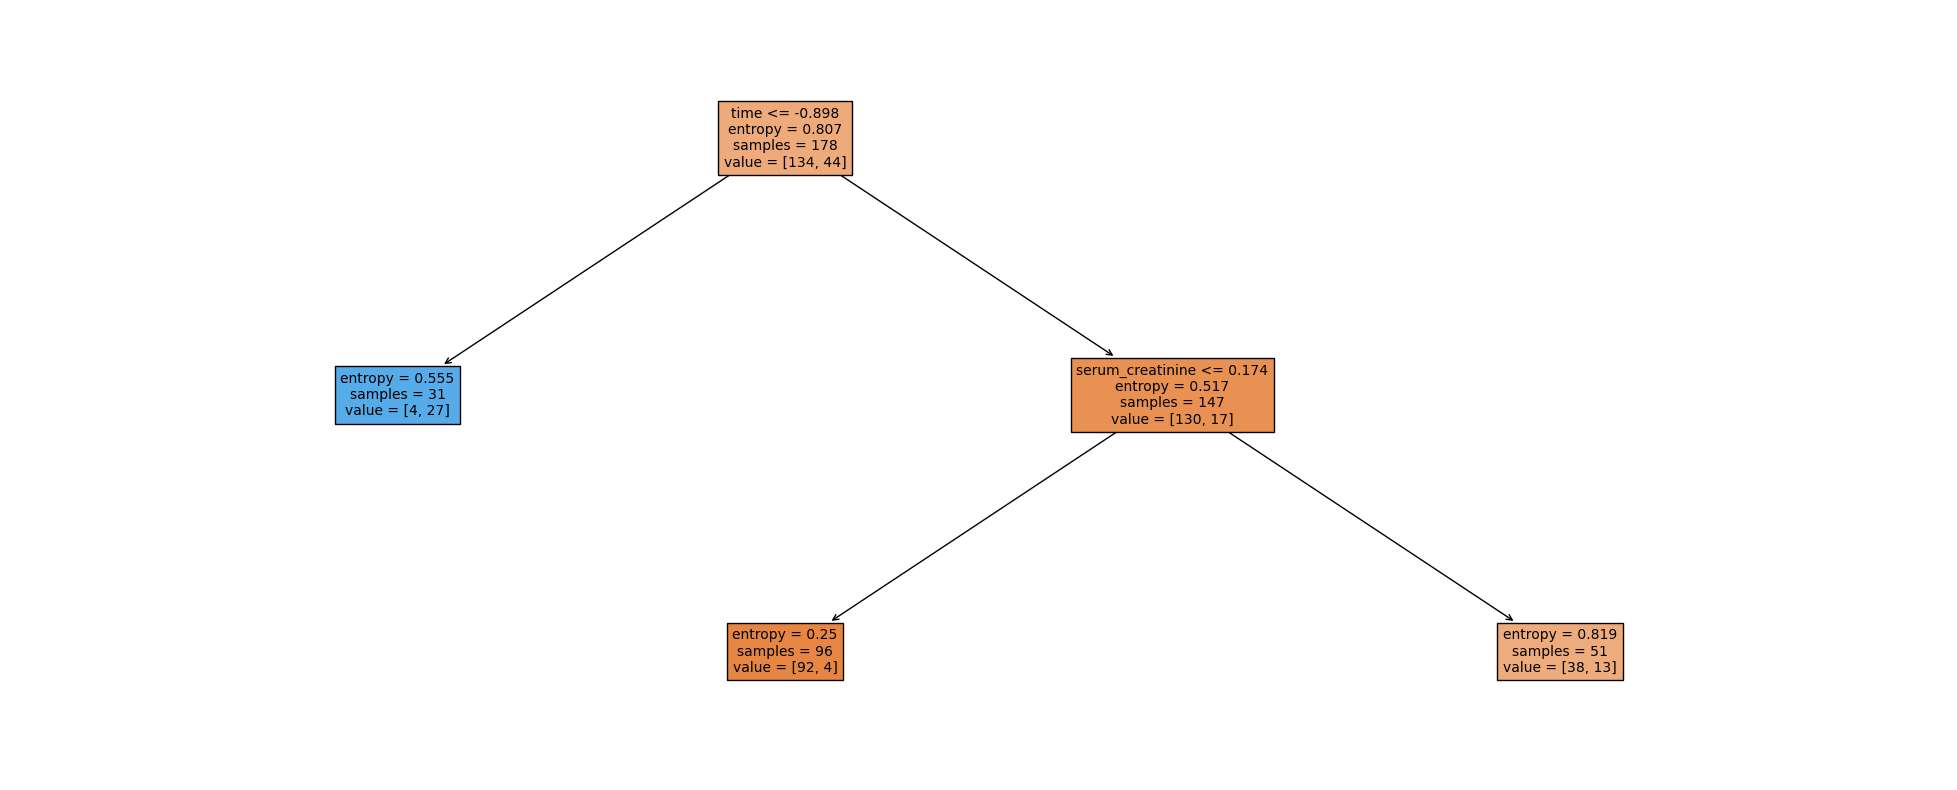

In [45]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=10)
plt.savefig("DecisionTreeClassifier.jpg")

## Predicting the data using Random Forest Classifier:

Implementation

In [46]:
rfc=RandomForestClassifier(max_features=0.5,max_depth=15,random_state=1)
rfc.fit(xtrain,ytrain)
rf_pred=rfc.predict(xtest)

In [47]:
rf_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0], dtype=int64)

Evaluation

In [48]:
rfc_acc=accuracy_score(ytest,rf_pred)
accuracy_list.append(100*rfc_acc)
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.81      0.76      0.79        17

    accuracy                           0.84        45
   macro avg       0.84      0.83      0.83        45
weighted avg       0.84      0.84      0.84        45



By using Random Forest we get 84% of accuracy.

## Predicting the data using Xgboost Classifier:

Implementation

In [49]:
xgb=xgboost.XGBRFClassifier(max_depth=3,random_state=1)
xgb.fit(xtrain,ytrain)
xgb_pred=xgb.predict(xtest)

In [50]:
xgb_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0])

Evaluation

In [51]:
xgb_acc=accuracy_score(ytest,xgb_pred)
accuracy_list.append(100*xgb_acc)
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.80      0.71      0.75        17

    accuracy                           0.82        45
   macro avg       0.82      0.80      0.81        45
weighted avg       0.82      0.82      0.82        45



By using XG Boost algorithm we get 82% of accuracy.

Here are the accuracy values for each model:

     Logistic Regression: Accuracy=88.89(89%)
     Support Vector Classifier (SVC): Accuracy=91.11(91%)
     Decision Tree Classifier: Accuracy=82.22(82%)
     Random Forest Classifier: Accuracy=84.44(84%)
     XGBoost Classifier: Accuracy=82.22(82%)

## Comparing models

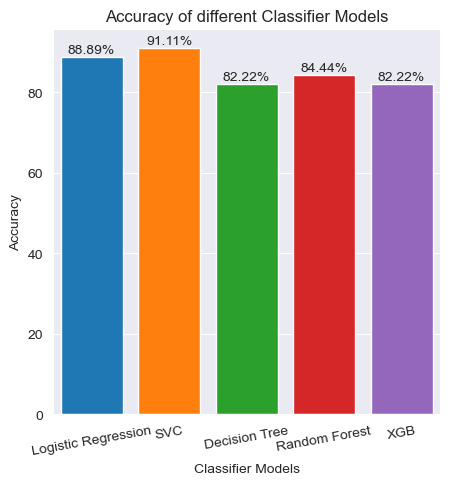

In [52]:
model_list=['Logistic Regression','SVC','Decision Tree','Random Forest','XGB']
plt.rcParams['figure.figsize']=5,5
sns.set_style('darkgrid')
ax=sns.barplot(x=model_list,y=accuracy_list,palette="tab10",saturation =2)
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different Classifier Models')
plt.xticks(rotation=10)
plt.yticks
for i in ax.patches:
    width,height=i.get_width(),i.get_height()
    x,y=i.get_xy() 
    ax.annotate(f'{round(height,2)}%',(x+width/2,y+height*1.01),ha='center')
plt.show()

### Conclusion:

These accuracy values represent how well each model performed in classifying the data.The models with higher accuracy are generally considered better at making predictions in this context The Logistic Regression and Support Vector Classifier(SVC) has the highest accuracy among the models listed.